Starting with a Kalman using the camera and the motor commands only

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

Next two steps depend on model only

In [2]:
def motModel(x, u, T1, r):
    g = np.array([0., 0., 0., 0., 0., 0.]) #just initializing a 2D array
    g[0] = (x[0] + T1*math.cos(x[4])*(u[0] + u[1])/2)
    g[1] = x[1] + T1*math.sin(x[4])*(u[0] + u[1])/2
    g[2] = math.cos(x[4])*(u[0] + u[1])/2
    g[3] = math.sin(x[4])*(u[0] + u[1])/2
    g[4] = x[4] + T1*(u[0] - u[1]) / (2*r)
    g[5] = (u[0] - u[1]) / (2*r)
    return g

In [3]:
def Gjacobian(theta, m1 ,m2, T1, r):
    #G = np.array([[0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.,0.,0.]])
    #the previous one was 6x8
    #i need 6x6
    G = np.array([[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.]])
    G[0,0] = 1
    G[1,1] = 1
    G[0,4] = -T1*math.sin(theta)*(m1+m2)/2
    G[1,4] = T1*math.cos(theta)*(m1+m2)/2
    G[2,4] = -math.sin(theta)*(m1+m2)/2
    G[3,4] = math.cos(theta)*(m1+m2)/2
    G[4,4] = 1
    return G

Next two steps depend on measurements

In [4]:
def measModel(x,T1,r):
    h = np.array([0.,0.])
    h[0] = x[0]
    h[1] = x[1]
    return h

In [5]:
def Hjacobian(theta, T1, camState):
    H = np.array([[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.]])
    H[0,0] = 1
    H[1,1] = 1
    if camState == 'false':
        H[0,0] = 0
        H[1,1] = 0
    return H

In [6]:
def kalmanFilter(mu_prev, sig_prev, u, meas, T1, r, R, Q, camState):
    
    #a priori estimations
    mu_est_a_priori = motModel(mu_prev,u,T1,r) #a priori estimation of position. mu_t = g(u,mu_t-1)
    
    theta = mu_est_a_priori[4]
    print('theta a priori', theta)
    m1 = u[0]
    m2 = u[1]
    G = Gjacobian(theta,m1,m2,T1,r)
    sig_est_a_priori = (G @ sig_prev @ np.transpose(G)) + R
    
    #gain computation
    H = Hjacobian(theta,T1, camState)
    K = sig_est_a_priori @ np.transpose(H) @ np.linalg.inv((H @ sig_est_a_priori @np.transpose(H)) + Q)
    
    #measurement update
    mu_est_a_posteriori = mu_est_a_priori.reshape(-1,1) + (K@(meas - measModel(mu_prev,T1,r)).reshape(-1,1))
    sig_est_a_posteriori = (np.identity(6) - (K @ H)) @ sig_est_a_priori
    print('theta a posteriori', mu_est_a_posteriori[4])
    print('')
    
    return mu_est_a_posteriori, sig_est_a_posteriori
    #return mu_est_a_priori, sig_est_a_priori

/*----------------------------------------------------------------------------------------*/

Les deux prochaines cellules sont juste des simulations que j'ai faites

In [7]:
#for the measurements, i make the robot go straight right so only camX will be changing
#set the motor speed to 25mm/s, T1 = 10Hz so it should be moving 2.5mm/frame
#i'll go for around 100 measurements, so 10sec
meas = np.array([0.,0.])

#J'essaie avec des valeurs au bol...
mu_init = np.array([0.,0.,0.,0.,0.,0.]) #inital state at zero
sig_init = np.array([[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.]])
u = np.array([25.,25.])
T1 = 0.1 #10Hz
r = 50 #mm
#uncertainty on state
R = np.array([[0.001,0.,0.,0.,0.,0.],[0.,0.001,0.,0.,0.,0.],[0.,0.,0.1,0.,0.,0.],[0.,0.,0.,0.1,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.1]])
#uncertainty on measurement
Q = np.array([[0.001,0.],[0.,0.001]])

x_pos_kal = np.zeros(500)
y_pos_kal = np.zeros(500)
x_pos_cam = np.zeros(500)
y_pos_cam = np.zeros(500)
error_x = np.zeros(500)
error_y = np.zeros(500)

move_range = 100

hide_camera = 'true'
camState = 'true' #do not change this one here

theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a posteriori [0.]

theta 0.0
theta a priori 0.0
theta a p

theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.141592653589793
theta a posteriori [3.14159265]

theta 180.0
theta a priori 3.14

theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.283185307179586
theta a posteriori [6.28318531]

theta 360.0
theta a priori 6.28

<function matplotlib.pyplot.show(*args, **kw)>

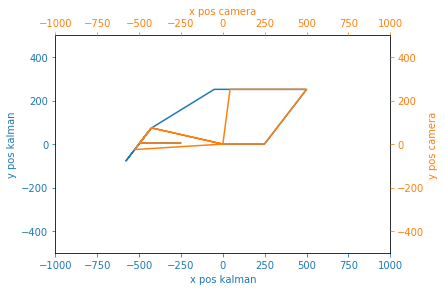

In [8]:
mu_prev = mu_init
sig_prev = sig_init

for i in range(move_range):
    (mu,sig) = kalmanFilter(mu_prev, sig_prev, u, meas, T1, r, R, Q, camState)
    mu_prev = np.concatenate(np.transpose(mu))
    sig_prev = sig
    x_pos_kal[i] = mu_prev[0]
    y_pos_kal[i] = mu_prev[1]
    x_pos_cam[i] = meas[0]
    y_pos_cam[i] = meas[1]
    error_x[i] = (meas[0]-mu_prev[0])
    error_y[i] = (meas[1]-mu_prev[1])
    print('theta', mu_prev[4]*180/math.pi)
    meas = meas + (0.5+random.random())*np.array([2.5,0.])
print('end 1st move')
mu_prev[4] = math.pi/4 #change myself at 45°

for i in range(move_range):
    (mu,sig) = kalmanFilter(mu_prev, sig_prev, u, meas, T1, r, R, Q, camState)
    mu_prev = np.concatenate(np.transpose(mu))
    sig_prev = sig
    x_pos_kal[100+i] = mu_prev[0]
    y_pos_kal[100+i] = mu_prev[1]
    x_pos_cam[100+i] = meas[0]
    y_pos_cam[100+i] = meas[1]
    error_x[i] = (meas[0]-mu_prev[0])
    error_y[i] = (meas[1]-mu_prev[1])
    print('theta', mu_prev[4]*180/math.pi)
    meas = meas + (0.5+random.random())*np.array([2.5,2.5])
print('end 2nd move')
mu_prev[4] = math.pi #change myself at 180°

for i in range(move_range):  
    (mu,sig) = kalmanFilter(mu_prev, sig_prev, u, meas, T1, r, R, Q, camState)
    mu_prev = np.concatenate(np.transpose(mu))
    sig_prev = sig
    x_pos_kal[200+i] = mu_prev[0]
    y_pos_kal[200+i] = mu_prev[1]
    x_pos_cam[200+i] = meas[0]
    y_pos_cam[200+i] = meas[1]
    error_x[i] = (meas[0]-mu_prev[0])
    error_y[i] = (meas[1]-mu_prev[1])
    print('theta', mu_prev[4]*180/math.pi)
    #meas = meas + np.array([-5.,0]) + (0.5+random.random())*np.array([-2.5,0.]) 
    meas = meas + np.array([-7.5,0]) 
    if hide_camera == 'true' and i > 60 and i<99:
        meas = np.array([0,0])
        camState = 'false'
    if hide_camera == 'true' and i == 99:
        meas = np.array([-426.94,74.56])
        camState = 'true'
print('end 3rd move')
mu_prev[4] = 5*math.pi/4 #change myself at 225°

for i in range(move_range):
    (mu,sig) = kalmanFilter(mu_prev, sig_prev, u, meas, T1, r, R, Q, camState)
    mu_prev = np.concatenate(np.transpose(mu))
    sig_prev = sig
    x_pos_kal[300+i] = mu_prev[0]
    y_pos_kal[300+i] = mu_prev[1]
    x_pos_cam[300+i] = meas[0]
    y_pos_cam[300+i] = meas[1]
    error_x[i] = (meas[0]-mu_prev[0])
    error_y[i] = (meas[1]-mu_prev[1])
    print('theta', mu_prev[4]*180/math.pi)
    meas = meas + (0.5+random.random())*np.array([-2.5,-2.5])
    if hide_camera == 'true' and i > 40 and i<70:
        meas = np.array([0,0])
        camState = 'false'
    if hide_camera == 'true' and i == 70:
        meas = np.array([-426.94,74.56])
        camState = 'true'
print('end 4th move')  
mu_prev[4] =2*math.pi #change myself at 0°

for i in range(move_range):
    (mu,sig) = kalmanFilter(mu_prev, sig_prev, u, meas, T1, r, R, Q, camState)
    mu_prev = np.concatenate(np.transpose(mu))
    sig_prev = sig
    x_pos_kal[400+i] = mu_prev[0]
    y_pos_kal[400+i] = mu_prev[1]
    x_pos_cam[400+i] = meas[0]
    y_pos_cam[400+i] = meas[1]
    error_x[i] = (meas[0]-mu_prev[0])
    error_y[i] = (meas[1]-mu_prev[1])
    print('theta', mu_prev[4]*180/math.pi)
    meas = meas + (0.5+random.random())*np.array([2.5,0.])
print('end 5th move')  

print('measured x position', meas[0])
print('estimated x position', mu_prev[0])
print('measured y position', meas[1])
print('estimated y position', mu_prev[1])
print('maximum x error', max(error_x))
print('maximum y error', max(error_y))

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on = False)

ax.plot(x_pos_kal, y_pos_kal, color="C0")
ax.set_xlabel("x pos kalman", color="C0")
ax.set_ylabel("y pos kalman", color="C0")
ax.tick_params(axis='x', colors="C0") #change la couleur des axes
ax.tick_params(axis='y', colors="C0")
ax.set_ylim([-500,500])
ax.set_xlim([-1000,1000])

ax2.plot(x_pos_cam, y_pos_cam, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("x pos camera", color="C1")
ax2.set_ylabel("y pos camera", color="C1")
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
ax2.set_ylim([-500,500])
ax2.set_xlim([-1000,1000])

plt.show

J'ai des problèmes avec les angles que je sais pas résoudre...


/*----------------------------------------------------------------------------------------*/ -18x, 22y

In [9]:
math.atan(22/-18)

-0.8850668158886104

J'ai les mesures de position de camera de Tanguy donc je peux essayer avec ça

In [10]:
meas = np.array([[373, 1504], [373, 1503], [373, 1503], [373, 1503], [374, 1503], [372, 1504], [373, 1505], [374, 1503], [373, 1503], [373, 1503], [372, 1503], [372, 1503], [372, 1503], [374, 1504], [373, 1505], [373, 1504], [373, 1505], [374, 1503], [371, 1502], [371, 1502], [374, 1503], [374, 1503], [373, 1505], [374, 1505], [374, 1505], [374, 1505], [374, 1503], [373, 1502], [372, 1503], [372, 1503], [374, 1503], [376, 1503], [377, 1502], [376, 1501], [375, 1499], [378, 1497], [377, 1497], [378, 1495], [379, 1495], [381, 1493], [382, 1492], [382, 1493], [386, 1488], [385, 1487], [387, 1484], [388, 1482], [388, 1483], [391, 1481], [391, 1481], [392, 1480], 
[392, 1480], [394, 1476], [395, 1474], [395, 1473], [396, 1470], [398, 1470], [399, 1469], [402, 1467], [402, 1467], [404, 1465], [404, 1465], [404, 1462], [405, 1461], [405, 1459], [408, 1458], [408, 1456], [411, 1455], [411, 1455], [412, 1452], [414, 1449], [415, 1448], [414, 1449], [414, 1449], [417, 1446], [418, 1446], [418, 1445], [421, 1443], [422, 1442], [422, 1439], [424, 1435], [423, 1435], [425, 1434], [427, 1431], [429, 1433], [429, 1433], [430, 1431], [432, 1429], [432, 1428], [433, 1425], [434, 1423], [436, 1421], [438, 1419], [440, 1418], [440, 1418], [442, 1415], [443, 1414], [443, 1414], [442, 1412], [443, 1410], [445, 1408], [446, 1408], 
[449, 1407], [450, 1405], [452, 1403], [452, 1401], [452, 1399], [454, 1398], [455, 1396], [455, 1396], [457, 1395], [457, 1394], [460, 1392], [460, 1391], [460, 1390], [462, 1386], [463, 1385], [464, 1384], [465, 1385], [468, 1383], [467, 1381], [467, 1381], [470, 1380], [470, 1378], [471, 1376], [472, 1375], [473, 1373], [476, 1372], [477, 1370], [479, 1370], [479, 1368], [480, 1365], [481, 1364], [481, 1364], [482, 1362], [483, 1362], [484, 1360], [486, 1358], [488, 1358], [489, 1353], [489, 1353], [492, 1350], [491, 1349], [493, 1348], [495, 1346], [495, 1346], [496, 1346], [496, 1345], [496, 1344], [497, 1343], [500, 1341], [501, 1337], [502, 1336], 
[502, 1335], [503, 1334], [503, 1333], [503, 1331], [503, 1331], [504, 1331], [504, 1328], [504, 1327], [503, 1328], [504, 1325], [506, 1322], [505, 1321], [506, 1320], [506, 1318], [505, 1318], [506, 1317], [506, 1317], [507, 1314], [507, 1314], [508, 1312], [508, 1310], [508, 1310], [508, 1305], [508, 1305], [509, 1302], [509, 1301], [510, 1301], [509, 1298], [509, 1298], [510, 1298], [510, 1296], [509, 1294], [510, 1293], [509, 1291], [510, 1289], [510, 1287], [509, 1286], [510, 1284], [509, 1283], [508, 1283], [508, 1283], [509, 1281], [508, 1280], [508, 1279], [509, 1277], [508, 1276], [508, 1273], [507, 1273], [506, 1272], [507, 1269], [506, 1269], 
[505, 1267], [505, 1267], [505, 1266], [505, 1265], [504, 1263], [505, 1261], [504, 1260], [504, 1257], [504, 1256], [503, 1254], [503, 1253], [503, 1251], [501, 1252], [501, 1252], [502, 1249], [501, 1247], [500, 1247], [499, 1246], [500, 1244], [498, 1241], [498, 1240], [497, 1240], [496, 1238], [497, 1237], [495, 1236], [495, 1236], [495, 1234], [493, 1233], [493, 1233], [493, 1231], [493, 1230], [491, 1228], [490, 1227], [490, 1226], [488, 1224], [488, 1222], [486, 1222], [486, 1222], [486, 1222], [486, 1220], [485, 1220], [484, 1219], [483, 1217], [482, 1215], [482, 1213], [480, 1214], [478, 1211], [478, 1210], [477, 1211], [477, 1211], [477, 1208], 
[475, 1208], [475, 1207], [473, 1206], [473, 1206], [471, 1203], [471, 1203], [470, 1202], [468, 1202], [467, 1200], [466, 1200], [466, 1200], [465, 1198], [464, 1199], [464, 1197], [462, 1197], [461, 1195], [460, 1193], [459, 1192], [458, 1191], [456, 1190], [456, 1190], [456, 1188], [456, 1188], [454, 1188], [454, 1188], [454, 1186], [453, 1184], [452, 1183], [450, 1182], [449, 1181], [449, 1179], [448, 1180], [447, 1177], [447, 1176], [447, 1176], [445, 1175], [444, 1174], [445, 1172], [444, 1170], [442, 1171], [442, 1168], [440, 1167], [440, 1167], [439, 1165], [438, 1165], [438, 1163], [438, 1163], [437, 1161], [436, 1162], [435, 1160], [435, 1156], 
[433, 1157], [433, 1155], [431, 1154], [431, 1154], [429, 1152], [428, 1152], [429, 1150], [428, 1150], [427, 1151], [427, 1149], [427, 1147], [426, 1147], [425, 1146], [424, 1143], [422, 1142], [422, 1142], [421, 1139], [420, 1140], [420, 1138], [420, 1138], [419, 1136], [418, 1135], [417, 1135], [417, 1133], [416, 1132], [415, 1130], [413, 1129], [413, 1128], [411, 1127], [411, 1125], [411, 1124], [411, 1124], [410, 1124], [410, 1124], [408, 1123], [408, 1122], [407, 1121], [406, 1117], [404, 1117], [404, 1115], [403, 1115], [402, 1115], [402, 1113], [402, 1113], [401, 1113], [400, 1112], [399, 1110], [399, 1108], [397, 1108], [396, 1104], [395, 1104], 
[395, 1103], [394, 1102], [392, 1103], [392, 1100], [392, 1100], [392, 1099], [390, 1099], [390, 1097], [390, 1094], [388, 1095], [388, 1093], [385, 1092], [385, 1090], [386, 1090], [383, 1089], [383, 1088], [383, 1088], [383, 1086], [382, 1085], [379, 1086], [380, 1083], [379, 1083], [378, 1081], [378, 1079], [376, 1079], [376, 1077], [376, 1076], [374, 1076], [374, 1076], [374, 1074], [373, 1073], [372, 1073], [371, 1069], [371, 1069], [369, 1067], [369, 1065], [367, 1065], [367, 1064], [367, 1061], [366, 1061], [366, 1061], [366, 1060], [366, 1057], [364, 1057], [364, 1056], [364, 1053], [363, 1052], [363, 1050], [362, 1050], [362, 1048], [362, 1045], 
[361, 1044], [361, 1044], [361, 1043], [361, 1041], [361, 1039], [360, 1037], [360, 1036], [360, 1034], [360, 1033], [359, 1032], [359, 1031], [360, 1028], [360, 1027], [360, 1027], [359, 1026], [359, 1023], [359, 1022], [359, 1021], [359, 1019], [358, 1017], [359, 1015], [359, 1014], [358, 1013], [359, 1010], [359, 1009], [359, 1009], [359, 1009], [360, 1007], [359, 1006], [360, 1004], [360, 1003], [360, 1000], [360, 998], 
[360, 997], [360, 997], [361, 993], [361, 992], [361, 992], [361, 992], [361, 991], [361, 988], [361, 988], [362, 986], [363, 984], [363, 983], [363, 981], [364, 978], [363, 976], [364, 976], [364, 976], [365, 974], [364, 973], [365, 972], [366, 970], [366, 969], [368, 967], [367, 966], [368, 965], [369, 963], [370, 961], [369, 960], [369, 960], [371, 959], [372, 958], [371, 958], [372, 955], [372, 954], [374, 951], [374, 951], [375, 949], [375, 948], [376, 947], [378, 944], [378, 944], [379, 943], [379, 943], [380, 941], [380, 940], [380, 940], [383, 937], [383, 936], [383, 935], [385, 933], [386, 932], [386, 931], [386, 931], [387, 929], [387, 930], 
[388, 928], [390, 927], [390, 926], [392, 923], [392, 923], [394, 922], [395, 921], [396, 921], [397, 920], [397, 920], [397, 919], [399, 918], [398, 917], [400, 915], [401, 914], [404, 913], [405, 911], [406, 909], [407, 908], [409, 907], [409, 904], [409, 904], [408, 903], [411, 901], [411, 901], [412, 899], [414, 898], [416, 895], [417, 891], [416, 891], [417, 890], [420, 887], [421, 887], [421, 887], [421, 886], [423, 885], [424, 884], [424, 882], [427, 879], [427, 877], [429, 877], [430, 874], [432, 873], [432, 871], [434, 869], [434, 869], [433, 868], [434, 867], [437, 864], [437, 864], [439, 862], [440, 860], [441, 858], [442, 856], [442, 855], 
[444, 852], [443, 853], [443, 853], [445, 851], [446, 849], [448, 847], [449, 846], [449, 844], [451, 843], [453, 841], [452, 839], [454, 837], [455, 837], [456, 835], [456, 835], [458, 831], [458, 831], [458, 829], [461, 827], [462, 827], [465, 823], [464, 824], [467, 821], [467, 819], [467, 818], [469, 816], [469, 816], [470, 814], [470, 814], [471, 812], [473, 810], [474, 810], [477, 806], [477, 805], [477, 803], [479, 802], [479, 801], [479, 800], [479, 799], [481, 796], [483, 794], [483, 795], [485, 793], [485, 793], [487, 790], [489, 785], [489, 785], [492, 784], [492, 782], [492, 782], [492, 782], [495, 779], [495, 777], [495, 774], [496, 774], 
[498, 772], [501, 769], [502, 767], [501, 767], [502, 764], [504, 762], [504, 761], [504, 761], [506, 759], [507, 759], [508, 758], [509, 756], [510, 755], [511, 752], [512, 751], [514, 750], [514, 749], [516, 745], [518, 744], [518, 744], [518, 743], [519, 741], [520, 739], [521, 736], [522, 735], [522, 732], [524, 731], [525, 732], [525, 731], [525, 732], [526, 730], [526, 730], [524, 731], [523, 732], [525, 731], [526, 732], [526, 732], [526, 733], [525, 734], [526, 732]])

In [11]:
meas = np.array([[184, 742], [181, 744], [184, 742], [184, 742], [184, 742], [184, 743], [184, 743], [184, 742], [184, 742], [184, 742], [184, 742], [184, 742], [184, 742], [181, 745], [184, 743], [184, 743], [184, 743], [184, 742], [184, 742], [184, 742], [184, 742], [184, 742], [184, 743], [185, 743], [185, 743], [185, 743], [184, 743], [184, 742], [184, 742], [183, 742], [185, 742], [185, 742], [186, 741], [182, 743], [186, 740], [186, 739], [186, 739], [186, 738], [187, 738], [183, 741], [189, 736], [189, 737], [190, 734], [190, 734], [191, 733], [192, 732], [192, 732], [193, 731], [193, 731], [190, 733], [194, 731], [191, 731], [195, 728], [195, 727], [195, 726], [196, 726], [197, 726], [195, 726], [198, 724], [196, 724], [196, 724], [199, 722], [200, 721], [200, 720], [200, 720], [202, 719], [203, 718], [203, 718], [203, 717], [204, 716], [205, 715], [205, 715], [205, 715], [206, 714], [206, 714], [207, 713], [204, 714], [208, 712], [208, 710], [210, 708], [207, 709], [210, 708], [211, 707], [211, 707], [211, 707], [210, 707], [211, 706], [213, 705], [210, 705], [212, 703], [215, 701], [216, 701], [217, 700], [218, 700], [214, 701], [218, 698], [218, 698], [219, 697], [219, 696], [220, 695], [220, 695], [220, 695], [222, 694], [222, 693], [219, 695], [223, 691], [224, 690], [220, 693], [220, 693], [226, 688], [225, 688], [227, 687], [227, 687], [227, 686], [228, 685], [225, 686], [230, 683], [230, 683], [230, 683], [232, 681], [232, 681], [232, 681], [232, 680], [233, 679], [233, 679], [234, 678], [235, 677], [235, 676], [232, 679], [236, 675], [237, 674], [238, 673], [238, 673], [238, 672], [239, 672], [239, 671], [240, 671], [241, 671], [242, 668], [242, 668], [243, 667], [243, 666], [243, 665], [244, 664], [244, 664], [244, 664], [245, 664], [246, 663], [243, 663], [247, 662], [248, 660], [248, 660], [248, 659], [248, 658], [249, 658], [248, 657], [248, 657], [248, 657], [249, 656], [249, 655], [247, 656], [249, 654], [250, 653], [250, 652], [250, 652], [250, 651], [250, 650], [251, 650], [251, 650], [250, 649], [251, 649], [251, 648], [251, 646], [251, 647], [251, 644], [251, 644], [251, 643], [252, 642], [251, 642], [251, 641], [251, 641], [252, 640], [252, 640], [252, 639], [251, 638],[252, 638], [252, 636], [251, 636], [252, 635], [252, 634], [251, 634], [252, 633], [252, 633], [252, 632], [251, 632], [251, 631], [251, 630], [250, 630], [251, 629], [250, 629], [250, 628], [250, 627], [250, 627], [249, 626], [249, 626], [249, 625], [249, 625], [249, 623], [249, 623], [249, 622], [248, 621], [248, 620], [248, 619], [248, 619], [248, 618], [248, 618], [248, 618], [248, 617], [247, 616], [247, 615], [247, 615], [247, 614], [246, 613], [246, 612], [246, 612], [245, 611], [245, 610], [245, 610], [245, 610], [244, 610], [244, 609], [243, 608], [243, 608], [243, 607], [242, 606], [242, 605], [242, 605], [241, 604], [241, 604], [240, 603], [240, 603], [240, 603], [240, 602], [240, 602], [239, 601], [239, 601], [238, 600], [237, 599], [237, 599], [236, 599], [236, 597], [236, 598], [236, 598], [235, 596], [235, 596], [234, 596], [233, 596], [233, 595], [232, 594], [232, 594], [232, 594], [231, 593], [231, 592], [230, 592], [230, 592], [230, 592], [229, 591], [229, 591], [228, 591], [228, 590], [227, 589], [226, 589], [227, 588], [225, 588], [226, 588], [225, 587], [225, 587], [224, 587], [224, 586], [224, 585], [223, 585], [223, 584], [222, 583], [222, 583], [222, 582], [221, 582], [221, 581], [221, 580], [221, 580], [220, 580], [220, 579], [220, 579], [219, 578], [218, 578], [218, 577], [217, 577], [218, 576], [217, 575], [216, 575], [216, 574], [216, 574], [216, 574], [215, 573], [215, 573], [214, 572], [214, 572], [213, 571], [213, 570], [213, 570], [212, 569], [212, 568], [212, 568], [212, 568], [211, 568], [211, 567], [211, 566], [210, 566],[210, 566], [209, 564], [208, 564], [208, 564], [208, 563], [208, 563], [207, 562], [207, 562], [207, 561], [206, 561], [206, 560], [206, 560], [206, 559], [205, 558], [204, 558], [204, 557], [203, 557], [203, 556], [203, 556], [203, 556], [202, 555], [202, 555], [202, 555], [201, 554], [201, 553], [200, 552], [199, 551], [199, 551], [199, 551], [199, 550], [198, 550], [198, 550], [198, 549], [197, 549], [197, 548], [197, 547], [196, 547], [195, 545], [195, 545], [195, 544], [194, 545], [194, 545], [194, 543], [194, 543], [194, 543], [193, 543], [192, 542], [193, 541], [192, 541], [191, 540], [190, 539], [190, 539], [191, 538], [189, 538], [188, 538], [188, 538], [190, 536], [189, 536], [188, 536], [188, 535], [188, 535], [187, 533], [186, 533], [186, 533], [185, 532], [185, 531], [185, 531], [185, 531], [184, 530], [184, 529], [184, 529], [183, 529], [183, 528], [182, 527], [182, 526], [181, 526], [181, 525], [181, 524], [180, 524], [180, 524], [180, 523], [180, 523], [180, 522], [180, 521], [180, 520], [179, 519], [179, 519], [179, 518], [179, 517], [179, 516], [178, 515], [178, 515], [178, 515], [178, 514], [178, 513], [178, 513], [178, 512], [178, 511], [178, 510], [177, 509], [177, 509], [178, 508], [178, 507], [178, 507], [177, 506], [178, 505], [177, 505], [177, 504], [177, 503], [177, 502], [177, 501], [177, 501], [177, 500], [177, 499], [177, 498], [177, 498], [177, 498], [178, 497], [178, 496], [177, 495], [178, 495], [178, 493], [178, 493], [178, 492], [178, 492], [178, 490], [178, 490], [178, 490], [178, 490], [178, 488], [178,488], [178, 487], [178, 487], [179, 486], [179, 485], [180, 483], [179, 483], [180, 482], [179, 482], [179, 482], [180, 481], [180, 480], [180, 480], [181, 479], [181, 478], [181, 478], [181, 477], [182, 476], [181, 475], [182, 475], [182, 474], [182, 474], [182, 474], [183, 473], [183, 472], [184, 472], [184, 471], [184, 470], [184, 470], [185, 468], [185, 468], [185, 467], [186, 467], [186, 467], [187, 466], [186, 465], [187, 465], [187, 464], [188, 464], [189, 463], [189, 462], [189, 462], [190, 460], [190, 460], [190, 460], [190, 460], [191, 459], [191, 459], [192, 459], [192, 458], [192, 457], [193, 456], [194, 456], [194, 456], [196, 454], [195, 455], [196, 454], [196, 454], [196, 453], [197, 452], [197, 452], [197, 452], [198, 451], [199, 451], [200, 450], [200, 449], [200, 449], [201, 448], [201, 447], [201, 447], [202, 446], [203, 445], [203, 445], [204, 444], [205, 443], [205, 442], [205, 441], [206, 440], [206, 440], [207, 439], [208, 438], [208, 438], [208, 438], [208, 437], [209, 436], [209, 435], [210, 434], [211, 434], [212, 432], [213, 432], [213, 431], [214, 430], [214, 429], [214, 429], [214, 429], [214, 428], [215, 426], [215, 426], [216, 426], [217, 425], [218, 423], [218, 423], [218, 422], [218, 421], [219, 420], [219, 420], [220, 420], [221, 419], [221, 419], [222, 418], [222, 417], [223, 415], [223, 415], [224, 414], [225, 413], [225, 412], [226, 412], [226, 412], [226, 411], [227, 410], [226, 410], [227, 409], [228, 408], [229, 407], [230, 406], [230, 405], [230, 404], [231, 404], [231, 403], [231, 403], [232, 402], [232, 402], [233, 401], [233, 400], [234, 400], [235, 398], [235, 397], [236, 396], [237, 395], [237, 395], [237, 394], [237, 394], [238, 393], [238, 393], [239, 392], [240, 391], [240, 390], [241, 388], [241, 388], [242, 387], [242, 386], [243, 386], [244, 385], [244, 385], [244, 384], [244, 383], [244, 383], [245, 382], [246, 381], [247, 380], [248, 379], [248, 378], [248, 378], [248, 377], [249, 376], [249, 376], [250, 375], [250, 374], [251, 374], [252, 373], [252, 372], [253, 371], [253, 370], [253, 370], [254, 369], [255, 368], [256, 367], [256, 367], [256, 367], [256, 366], [257, 365], [257, 364], [257, 363], [259, 362], [259, 362], [259, 362], [259, 362], [259, 362], [259, 361], [259, 361], [259, 361], [259, 361], [259, 361], [259, 362], [259, 362], [259, 362], [259, 362]])

Du coup il faut aussi que je mette à jour les commandes du thymio

In [17]:
old_u = np.array([[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],
[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],
[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],
[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],
[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],
[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],
[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],
[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],[10,100],
[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],
[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],
[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],
[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],[50,50],
[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],
[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],
[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],
[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],[100,10],
[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],
[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],
[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],
[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75],[75,75]])

In [18]:
#Convert speed commands in mm/s
speed_conv = 0.33478260869565216
u = speed_conv*old_u
#J'essaie avec des valeurs au bol...
mu_init = np.array([374.,1503.,0.,0.,-0.885,0.]) #inital state at zero
sig_init = np.array([[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.],[0.,0.,0.,0.,0.,0.]])
T1 = 1/30 #10Hz
r = 47 #mm
#uncertainty on state
R = np.array([[0.01,0.,0.,0.,0.,0.],[0.,0.01,0.,0.,0.,0.],[0.,0.,0.01,0.,0.,0.],[0.,0.,0.,0.01,0.,0.],[0.,0.,0.,0.,0.0000000001,0.],[0.,0.,0.,0.,0.,0.01]])
#uncertainty on measurement
Q = np.array([[0.01,0.],[0.,0.01]])

x_pos_kal = np.zeros(len(meas))
y_pos_kal = np.zeros(len(meas))
x_pos_cam = np.zeros(len(meas))
y_pos_cam = np.zeros(len(meas))
error_x = np.zeros(len(meas))
error_y = np.zeros(len(meas))

move_range = 100

hide_camera = 'true'
camState = 'true' #do not change this one here

theta a priori -0.885
theta a posteriori [-0.885]

theta a priori -0.885
theta a posteriori [-0.88500106]

theta a priori -0.8850010563855784
theta a posteriori [-0.88500202]

theta a priori -0.8850020233581237
theta a posteriori [-0.88500263]

theta a priori -0.8850026277155608
theta a posteriori [-0.88500295]

theta a priori -0.8850029513974775
theta a posteriori [-0.8850031]

theta a priori -0.8850030966514226
theta a posteriori [-0.88500316]

theta a priori -0.8850031647231865
theta a posteriori [-0.88500322]

theta a priori -0.8850032164545872
theta a posteriori [-0.88500324]

theta a priori -0.885003239307978
theta a posteriori [-0.88500325]

theta a priori -0.8850032492193585
theta a posteriori [-0.88500325]

theta a priori -0.8850032534567811
theta a posteriori [-0.88500326]

theta a priori -0.8850032552478428
theta a posteriori [-0.88500326]

theta a priori -0.885003255997862
theta a posteriori [-0.88500328]

theta a priori -0.885003283330689
theta a posteriori [-0.88500322]



theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori -2.2526268950871913
theta a posteriori [-2.2526269]

theta a priori 

theta a posteriori [-0.88498548]

theta a priori -0.8849854816897653
theta a posteriori [-0.88498382]

theta a priori -0.8849838217032854
theta a posteriori [-0.88498275]

theta a priori -0.8849827516230591
theta a posteriori [-0.88498234]

theta a priori -0.884982342207896
theta a posteriori [-0.88498415]

theta a priori -0.8849841512481982
theta a posteriori [-0.88498681]

theta a priori -0.884986812338152
theta a posteriori [-0.88498783]

theta a priori -0.8849878304707858
theta a posteriori [-0.88498778]

theta a priori -0.884987781406149
theta a posteriori [-0.88498732]

theta a priori -0.8849873233042036
theta a posteriori [-0.88498671]

theta a priori -0.8849867079816754
theta a posteriori [-0.88498603]

theta a priori -0.8849860317847966
theta a posteriori [-0.88498776]

theta a priori -0.8849877616231661
theta a posteriori [-0.88498842]

theta a priori -0.8849884234483677
theta a posteriori [-0.88499067]

theta a priori -0.8849906717355726
theta a posteriori [-0.88499109]

the

<function matplotlib.pyplot.show(*args, **kw)>

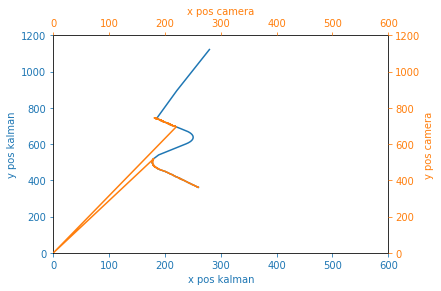

In [19]:
mu_prev = mu_init
sig_prev = sig_init

for i in range(len(meas)):
    (mu,sig) = kalmanFilter(mu_prev, sig_prev, u[i], meas[i], T1, r, R, Q, camState)
    mu_prev = np.concatenate(np.transpose(mu))
    #np.transpose(mu)
    sig_prev = sig
    x_pos_kal[i] = mu_prev[0]
    y_pos_kal[i] = mu_prev[1]
    x_pos_cam[i] = meas[i][0]
    y_pos_cam[i] = meas[i][1]
    error_x[i] = (meas[i][0]-mu_prev[0])
    error_y[i] = (meas[i][1]-mu_prev[1])
    if hide_camera == 'true' and i > 100 and i<400:
        meas[i+1] = [0.,0.]
        camState = 'false'
    if hide_camera == 'true' and i == 400:
        camState = 'true'

print('measured x position', meas[i][0])
print('estimated x position', mu_prev[0])
print('measured y position', meas[i][1])
print('estimated y position', mu_prev[1])
print('maximum x error', max(error_x))
print('maximum y error', max(error_y))

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on = False)

ax.plot(x_pos_kal, y_pos_kal, color="C0")
ax.set_xlabel("x pos kalman", color="C0")
ax.set_ylabel("y pos kalman", color="C0")
ax.tick_params(axis='x', colors="C0") #change la couleur des axes
ax.tick_params(axis='y', colors="C0")
ax.set_ylim([0,1200])
ax.set_xlim([0,600])
#ax.axis('equal')

ax2.plot(x_pos_cam, y_pos_cam, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("x pos camera", color="C1")
ax2.set_ylabel("y pos camera", color="C1")
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
ax2.set_ylim([0,1200])
ax2.set_xlim([0,600])
#ax2.axis('equal')
plt.show

In [15]:
test = []
mu_prev = mu_init
for i in range(len(u)):
    mu_prev=motModel(mu_prev,u[i],T1,r)
    test.append(mu_prev)

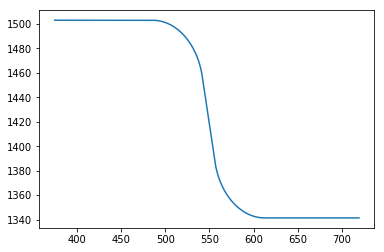

In [16]:
test=np.array(test)
test = test.T
plt.figure()
plt.plot(test[0,:],test[1,:])
#plt.plot(range(test.shape[1]), test[4,:])
